# Einlesen der Wetterdaten vom DWD
Leipzig: https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html;jsessionid=2BEE8FAF8E83A9A4984BE516FA2EFE0C.live21073?nn=16102

- historische Daten (`produkt_klima_tag_19340101_20181231_02932.txt`) (von **01.01.1934** bis **31.12.2018**)
- aktuelle Daten (`produkt_klima_tag_19340101_20181231_02932.txt`) (von **19.07.2019** bis **heute**)

- **Daten fehlen von 01.01.2019 bis 18.07.2019**

In [1]:
# Bibliotheken
import pandas as pd

## historische Wetterdaten einlesen

In [2]:
### Daten einlesen

data_hist = pd.read_csv("produkt_klima_tag_19340101_20181231_02932.txt", sep=";")
data_hist

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,2932,19340101,-999,-999.0,-999.0,1,0.3,8,0.0,0,8.0,6.0,1010.90,0.2,97.00,0.4,0.0,-0.6,eor
1,2932,19340102,-999,-999.0,-999.0,1,0.0,8,0.0,0,8.0,5.7,1007.70,-0.4,96.00,0.4,-1.0,-1.0,eor
2,2932,19340103,-999,-999.0,-999.0,1,0.0,8,0.0,0,8.0,5.2,1003.80,-0.9,89.00,-0.3,-1.1,-2.4,eor
3,2932,19340104,-999,-999.0,-999.0,1,0.0,0,1.4,0,6.7,4.8,1002.40,-0.8,82.00,0.7,-1.4,-3.4,eor
4,2932,19340105,-999,-999.0,-999.0,1,7.9,8,0.0,0,7.0,6.1,998.10,1.2,92.00,1.9,-1.4,-3.5,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22799,2932,20181227,3,9.3,4.1,3,0.0,6,-999.0,0,6.4,6.8,1009.49,4.5,80.71,6.8,1.3,-0.2,eor
22800,2932,20181228,3,9.3,4.9,3,0.2,6,-999.0,0,7.7,6.9,1010.10,3.1,89.54,4.6,0.5,-0.6,eor
22801,2932,20181229,3,13.4,6.4,3,3.6,6,-999.0,0,7.8,7.6,1010.20,4.2,92.00,5.9,3.2,2.8,eor
22802,2932,20181230,3,18.7,6.8,3,0.0,6,-999.0,0,7.4,8.0,1008.82,6.3,83.38,7.3,5.0,4.3,eor


#### Spaltenbedeutung 
aus `Metadaten_Parameter_klima_tag_02932.txt`

- TGK;Minimum der Lufttemperatur am Erdboden in 5cm Hoehe;°C
- TMK;Tagesmittel der Temperatur;°C
- TXK;Tagesmaximum der Lufttemperatur in 2m Höhe;°C


# Daten aufbereiten

## Aufgabe 1: benötigte Spalten rausziehen 

In [3]:
data_hist.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', '  FX', '  FM', 'QN_4', ' RSK',
       'RSKF', ' SDK', 'SHK_TAG', '  NM', ' VPM', '  PM', ' TMK', ' UPM',
       ' TXK', ' TNK', ' TGK', 'eor'],
      dtype='object')

In [5]:
data_hist = data_hist.loc[:,("MESS_DATUM"," TMK")]
data_hist

,MESS_DATUM,TMK
0,19340101,0.2
1,19340102,-0.4
2,19340103,-0.9
3,19340104,-0.8
4,19340105,1.2
...,...,...
22799,20181227,4.5
22800,20181228,3.1
22801,20181229,4.2
22802,20181230,6.3


## Aufgabe 2: aus Datumsspalte Jahr/Monat/Tag rausziehen

In [6]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22804 entries, 0 to 22803
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MESS_DATUM  22804 non-null  int64  
 1    TMK        22804 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 356.4 KB


`MESS_DATUM` ist `int64` . Es gibt aber auch ein Typ `datetime` der einige Vorteile hat:
1. Datum/Uhrzeit wird meistens automatisch erkannt
2. Aus diesem Format können wir dann einzellene Komponenten (wie Monat oder Jahr) einfach extrahieren

In [7]:
data_hist['Datum'] = pd.to_datetime(data_hist['MESS_DATUM'],format='%Y%m%d')
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22804 entries, 0 to 22803
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MESS_DATUM  22804 non-null  int64         
 1    TMK        22804 non-null  float64       
 2   Datum       22804 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 534.6 KB


In [9]:
data_hist.sample(10)

,MESS_DATUM,TMK,Datum
3418,19430512,16.5,1943-05-12
19149,20081229,-4.6,2008-12-29
16902,20021104,1.3,2002-11-04
21188,20140730,19.6,2014-07-30
6926,19750713,20.2,1975-07-13
16015,20000531,12.8,2000-05-31
16320,20010401,11.6,2001-04-01
19315,20090613,13.3,2009-06-13
14911,19970523,8.7,1997-05-23
15477,19981210,-5.8,1998-12-10


In [10]:
data_hist["Jahr"] = pd.DatetimeIndex(data_hist['Datum']).year
data_hist["Monat"] = pd.DatetimeIndex(data_hist['Datum']).month
data_hist["Tag"] = pd.DatetimeIndex(data_hist['Datum']).day
data_hist

,MESS_DATUM,TMK,Datum,Jahr,Monat,Tag
0,19340101,0.2,1934-01-01,1934,1,1
1,19340102,-0.4,1934-01-02,1934,1,2
2,19340103,-0.9,1934-01-03,1934,1,3
3,19340104,-0.8,1934-01-04,1934,1,4
4,19340105,1.2,1934-01-05,1934,1,5
...,...,...,...,...,...,...
22799,20181227,4.5,2018-12-27,2018,12,27
22800,20181228,3.1,2018-12-28,2018,12,28
22801,20181229,4.2,2018-12-29,2018,12,29
22802,20181230,6.3,2018-12-30,2018,12,30


## Aufgabe 3: Spalten umbennen und unbenötigte Spalten löschen

In [12]:
data_hist = data_hist.drop(["MESS_DATUM"],axis=1)

KeyError: "['MESS_DATUM'] not found in axis"

In [13]:
data_hist

,TMK,Datum,Jahr,Monat,Tag
0,0.2,1934-01-01,1934,1,1
1,-0.4,1934-01-02,1934,1,2
2,-0.9,1934-01-03,1934,1,3
3,-0.8,1934-01-04,1934,1,4
4,1.2,1934-01-05,1934,1,5
...,...,...,...,...,...
22799,4.5,2018-12-27,2018,12,27
22800,3.1,2018-12-28,2018,12,28
22801,4.2,2018-12-29,2018,12,29
22802,6.3,2018-12-30,2018,12,30


In [15]:
data_hist.rename(columns={" TMK":"Tagesmitteltemperatur [°C]"}, inplace=True)
data_hist


,Tagesmitteltemperatur [°C],Datum,Jahr,Monat,Tag
0,0.2,1934-01-01,1934,1,1
1,-0.4,1934-01-02,1934,1,2
2,-0.9,1934-01-03,1934,1,3
3,-0.8,1934-01-04,1934,1,4
4,1.2,1934-01-05,1934,1,5
...,...,...,...,...,...
22799,4.5,2018-12-27,2018,12,27
22800,3.1,2018-12-28,2018,12,28
22801,4.2,2018-12-29,2018,12,29
22802,6.3,2018-12-30,2018,12,30


## Aktuelle Werte einlesen (ab 2019)

### Datenaufbereitung analog `data_hist`

In [16]:
# Einlesen
data_aktuell = pd.read_csv("produkt_klima_tag_20190719_20210118_02932.txt", sep=";")

# Spalten rausziehen
data_aktuell = data_aktuell.loc[:,("MESS_DATUM"," TMK")]

# Datumspalte in Datumsformat ändern
data_aktuell['Datum'] = pd.to_datetime(data_aktuell['MESS_DATUM'],format='%Y%m%d')

# Spalten für Jahr Monat und Tag hinzufuegen
data_aktuell["Jahr"] = pd.DatetimeIndex(data_aktuell['Datum']).year
data_aktuell["Monat"] = pd.DatetimeIndex(data_aktuell['Datum']).month
data_aktuell["Tag"] = pd.DatetimeIndex(data_aktuell['Datum']).day

# alte Datumsspalte entfernen
data_aktuell = data_aktuell.drop(["MESS_DATUM"],axis=1)

# Temperaturspalte umbennnen
data_aktuell.rename(columns={" TMK":"Tagesmitteltemperatur [°C]"}, inplace=True)

data_aktuell

,Tagesmitteltemperatur [°C],Datum,Jahr,Monat,Tag
0,20.1,2019-07-19,2019,7,19
1,22.6,2019-07-20,2019,7,20
2,21.5,2019-07-21,2019,7,21
3,21.8,2019-07-22,2019,7,22
4,24.9,2019-07-23,2019,7,23
...,...,...,...,...,...
545,0.4,2021-01-14,2021,1,14
546,-0.8,2021-01-15,2021,1,15
547,-3.3,2021-01-16,2021,1,16
548,-3.8,2021-01-17,2021,1,17


## Historische und aktuelle Daten zusammenfuegen

In [17]:
df = pd.concat([data_hist, data_aktuell])
df

,Tagesmitteltemperatur [°C],Datum,Jahr,Monat,Tag
0,0.2,1934-01-01,1934,1,1
1,-0.4,1934-01-02,1934,1,2
2,-0.9,1934-01-03,1934,1,3
3,-0.8,1934-01-04,1934,1,4
4,1.2,1934-01-05,1934,1,5
...,...,...,...,...,...
545,0.4,2021-01-14,2021,1,14
546,-0.8,2021-01-15,2021,1,15
547,-3.3,2021-01-16,2021,1,16
548,-3.8,2021-01-17,2021,1,17


### Aufgabe 1:  fehlerhafte Daten aussortieren

Einige Werten erscheinen als -999 und sind somit fehlerhaft. Diese wollen wir aussortieren

In [18]:
df.describe()

,Tagesmitteltemperatur [°C],Jahr,Monat,Tag
count,23354.000000,23354.000000,23354.000000,23354.000000
mean,6.682453,1982.522523,6.536396,15.723002
std,52.467027,26.481114,3.461873,8.800187
min,-999.000000,1934.000000,1.000000,1.000000
25%,3.500000,1972.000000,4.000000,8.000000
50%,9.500000,1988.000000,7.000000,16.000000
75%,15.500000,2004.000000,10.000000,23.000000
max,30.200000,2021.000000,12.000000,31.000000


In [14]:
df.sort_values(by=["Tagesmitteltemperatur [°C]"]).head(10)

,Tagesmitteltemperatur [°C],Datum,Jahr,Monat,Tag
5015,-999.0,1948-04-14,1948,4,14
5057,-999.0,1948-05-26,1948,5,26
5058,-999.0,1948-05-27,1948,5,27
5059,-999.0,1948-05-28,1948,5,28
5037,-999.0,1948-05-06,1948,5,6
5060,-999.0,1948-05-29,1948,5,29
5004,-999.0,1948-04-03,1948,4,3
5036,-999.0,1948-05-05,1948,5,5
5056,-999.0,1948-05-25,1948,5,25
5061,-999.0,1948-05-30,1948,5,30


In [20]:
# rausfiltern
df = df.loc[df["Tagesmitteltemperatur [°C]"] > -999]

# pruefen
df.sort_values(by=["Tagesmitteltemperatur [°C]"]).head(20)

,Tagesmitteltemperatur [°C],Datum,Jahr,Monat,Tag
2201,-22.1,1940-01-11,1940,1,11
11129,-21.9,1987-01-14,1987,1,14
2212,-20.6,1940-01-22,1940,1,22
11128,-19.4,1987-01-13,1987,1,13
2200,-19.2,1940-01-10,1940,1,10
11126,-18.9,1987-01-11,1987,1,11
19157,-18.9,2009-01-06,2009,1,6
14769,-17.8,1997-01-01,1997,1,1
2208,-17.6,1940-01-18,1940,1,18
2948,-17.3,1942-01-27,1942,1,27


### Aufgabe 2: Anzahl der Einträge pro Jahr sichtbar machen 

Mit `.unqiue()` können wir die verschiedenen Einträge sichtbar machen

In [21]:
df["Jahr"].unique()

array([1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

mit `value_counts()` können wir die Einträge pro Jahr zählen

In [22]:
df["Jahr"].value_counts()

1936    366
2008    366
1988    366
1940    366
1980    366
       ... 
1972    245
2019    166
1945    163
1950    115
2021     18
Name: Jahr, Length: 67, dtype: int64

Der einfachste Weg es grafisch sichtbar zu machen ist den `Seaborn` `countplot` zu verwenden

<AxesSubplot:xlabel='count', ylabel='Jahr'>

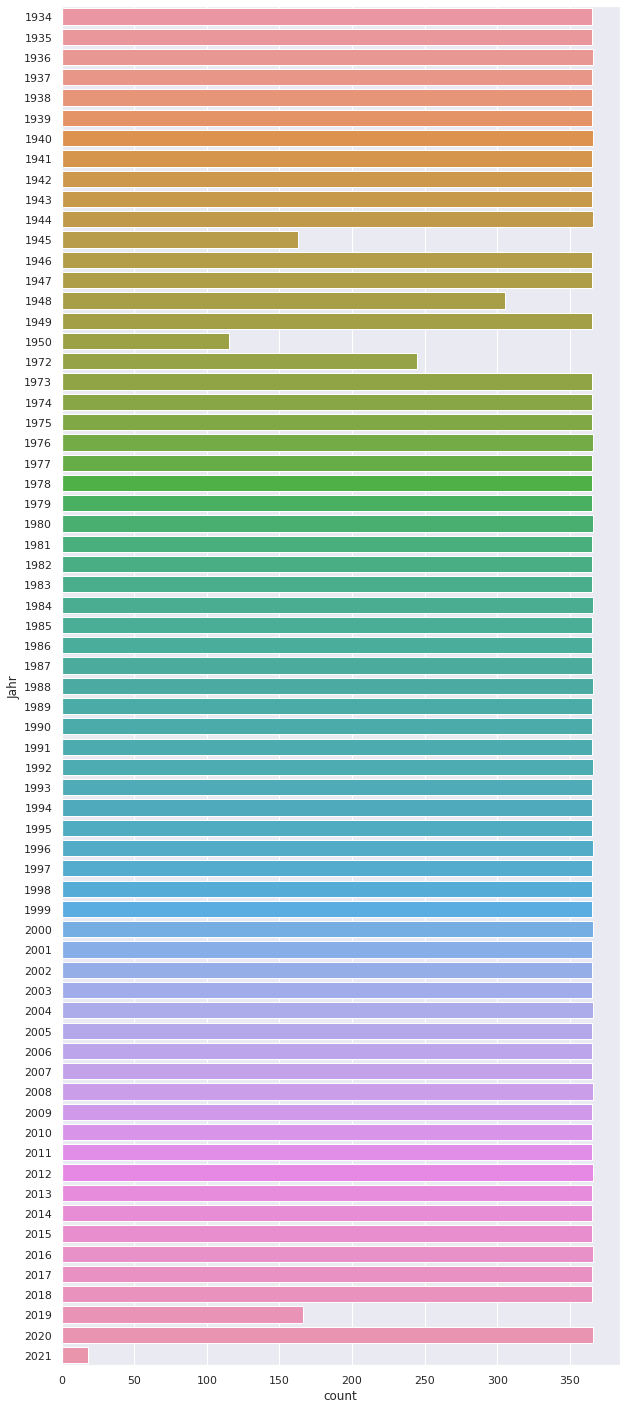

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,25)})
sns.countplot(data=df, y="Jahr")


### Aufgabe 3: fehlende Jahre sichtbar machen

Um die fehlenden Jahre sichtbar zu machen fügen wir einen neuen DataFrame ein mit allen Jahreszahlen und fügen den dann mit dem alten DataFrame zusammen

In [24]:
import numpy as np 
Jahre = np.linspace(1934,2021,2021-1934+1)
df_Jahre = pd.DataFrame(Jahre, dtype="int") # als Integer eingefügt, da andere Jahreszahlen auch integer sind
df_Jahre.columns=["Jahr"]
df_Jahre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jahr    88 non-null     int64
dtypes: int64(1)
memory usage: 832.0 bytes


In [25]:
# neuen dataframe aus alten kopieren 
df_test = df
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23292 entries, 0 to 549
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Tagesmitteltemperatur [°C]  23292 non-null  float64       
 1   Datum                       23292 non-null  datetime64[ns]
 2   Jahr                        23292 non-null  int64         
 3   Monat                       23292 non-null  int64         
 4   Tag                         23292 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.7 MB


In [26]:
# in Schleife abfragen ob Jahr vorhanden, wenn Zeile leer ist Jahr hinzufuegen
count = 0
for i in Jahre:
    if df_test.loc[df_test["Jahr"]==i].empty:
        print(int(i))
        count=count+1
        df_test = df_test.append({'Jahr': int(i)},ignore_index=True,sort=True)

print("Es wurden "+str(count)+" Jahre hinzugefuegt")

1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
Es wurden 21 Jahre hinzugefuegt


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23313 entries, 0 to 23312
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Datum                       23292 non-null  object 
 1   Jahr                        23313 non-null  float64
 2   Monat                       23292 non-null  float64
 3   Tag                         23292 non-null  float64
 4   Tagesmitteltemperatur [°C]  23292 non-null  float64
dtypes: float64(4), object(1)
memory usage: 910.8+ KB


Aus den Spalten mit integer sind nun float geworden, dies änder wir zurück

In [28]:
df_test["Jahr"] = df_test["Jahr"].astype(int)

<AxesSubplot:xlabel='count', ylabel='Jahr'>

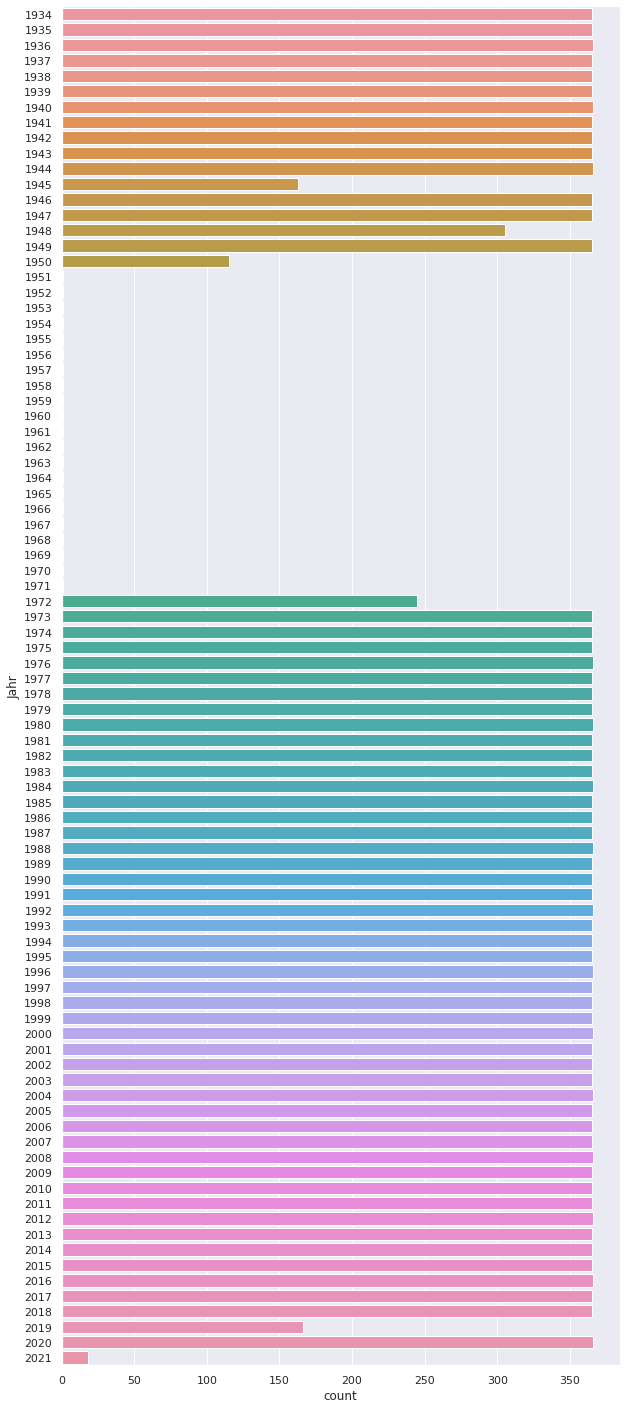

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,25)})
sns.countplot(data=df_test, y="Jahr")

### Aufgabe 4:  Aussortieren von Jahren mit zu wenigen Werten

Diese würden sonst keinen richtigen Jahresmittelwert ergeben

<AxesSubplot:xlabel='count', ylabel='Jahr'>

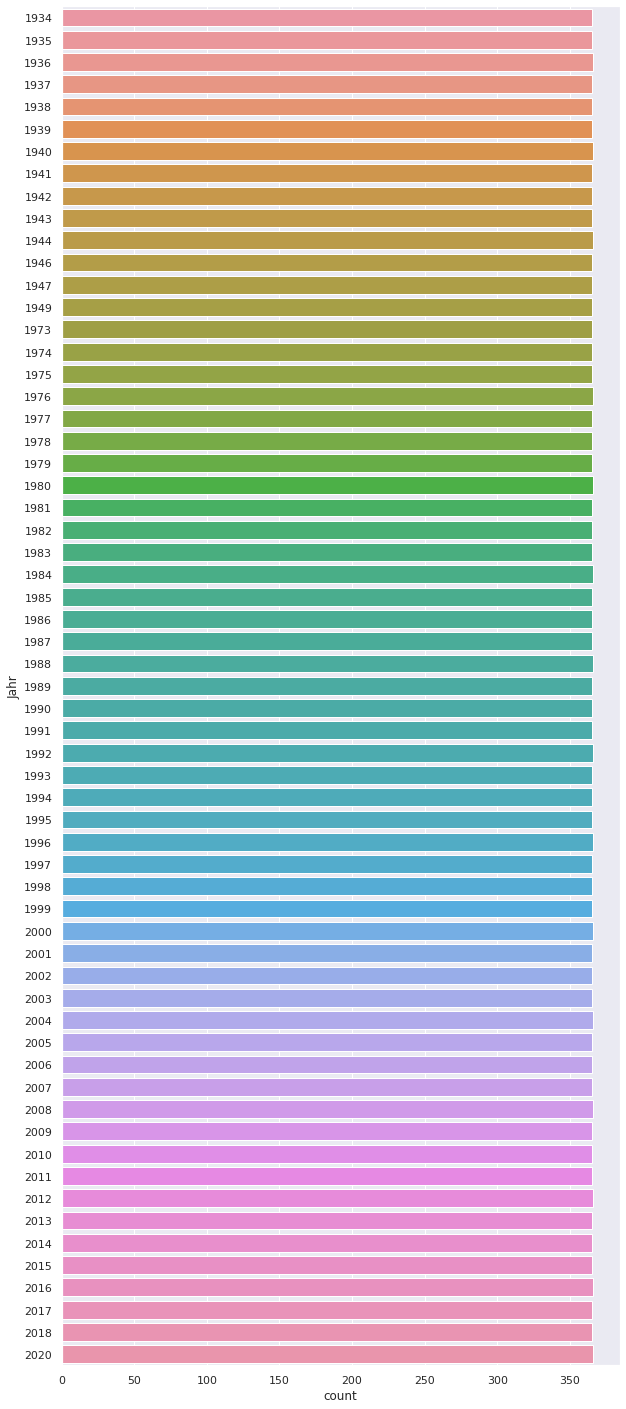

In [30]:
df_2 = df.groupby(by=["Jahr"]).filter(lambda x: len(x) > 360)
import seaborn as sns
sns.set(rc={'figure.figsize':(10,25)})
sns.countplot(data=df_2, y="Jahr")

### Aufgabe 4: Daten als csv exportieren (Zwischenspeichern)

In [31]:
df_2.to_csv("Leipzig_Tageswerte_volle_Jahre.csv",index=False)

# Plot 1: Mittelwert über die Jahre plotten

## Mittelwerte bestimmen

In [32]:
Jahresmittelwerte = df_2.groupby(by=["Jahr"]).mean().reset_index()
Jahresmittelwerte

,Jahr,Tagesmitteltemperatur [°C],Monat,Tag
0,1934,10.405205,6.526027,15.720548
1,1935,9.070959,6.526027,15.720548
2,1936,9.051913,6.513661,15.756831
3,1937,9.216712,6.526027,15.720548
4,1938,9.200548,6.526027,15.720548
...,...,...,...,...
56,2015,10.771233,6.526027,15.720548
57,2016,10.388251,6.513661,15.756831
58,2017,10.365753,6.526027,15.720548
59,2018,11.265205,6.526027,15.720548


## Spalte umbennnen

In [33]:
Jahresmittelwerte.rename(columns={"Tagesmitteltemperatur [°C]":"Jahresmitteltemperatur [°C]"},inplace=True)
Jahresmittelwerte

,Jahr,Jahresmitteltemperatur [°C],Monat,Tag
0,1934,10.405205,6.526027,15.720548
1,1935,9.070959,6.526027,15.720548
2,1936,9.051913,6.513661,15.756831
3,1937,9.216712,6.526027,15.720548
4,1938,9.200548,6.526027,15.720548
...,...,...,...,...
56,2015,10.771233,6.526027,15.720548
57,2016,10.388251,6.513661,15.756831
58,2017,10.365753,6.526027,15.720548
59,2018,11.265205,6.526027,15.720548


## nicht benötigte Spalten entfernen
da wir mit `.groupby()` und `.mean()`den Mittelwert aller Spalten bestimmt haben, schmeißen wir nun die Spalten `Monat` und `Tag` raus, da diese keine Sinn ergeben

In [34]:
Jahresmittelwerte.drop(["Monat","Tag"],axis=1,inplace=True)
Jahresmittelwerte

,Jahr,Jahresmitteltemperatur [°C]
0,1934,10.405205
1,1935,9.070959
2,1936,9.051913
3,1937,9.216712
4,1938,9.200548
...,...,...
56,2015,10.771233
57,2016,10.388251
58,2017,10.365753
59,2018,11.265205


## Daten als csv exportieren

In [35]:
Jahresmittelwerte.to_csv("Leipzig_Jahreswerte_volle_Jahre.csv",index=False)

## die 10 Jahre mit den höchsten Mittelwerten anzeigen

In [36]:
Jahresmittelwerte.sort_values(by=["Jahresmitteltemperatur [°C]"],ascending=False).head(10)

,Jahr,Jahresmitteltemperatur [°C]
59,2018,11.265205
60,2020,11.257650
55,2014,10.963288
56,2015,10.771233
41,2000,10.610383
48,2007,10.536986
35,1994,10.420274
0,1934,10.405205
31,1990,10.395616
57,2016,10.388251


# Plot 1a: Jahresmittelwerte absolut

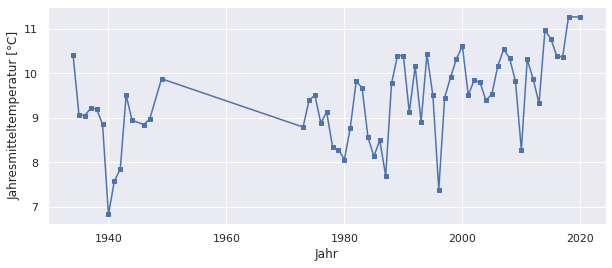

In [38]:
# import
import matplotlib.pyplot as plt

# Mittelwerte bestimmen

plt.figure(figsize=(10,4))
plt.ylabel("Jahresmitteltemperatur [°C]")
plt.xlabel("Jahr")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur [°C]"],marker="s",markersize=4)


# Plot 1b: Jahresmittelwerte absolut mit rollendem Mittelwert

## Rollenden Mittelwert hinzufügen

In [39]:
Jahresmittelwerte["Jahresmitteltemperatur_RM5 [°C]"] = Jahresmittelwerte["Jahresmitteltemperatur [°C]"].rolling(5).mean()
Jahresmittelwerte

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperatur_RM5 [°C]
0,1934,10.405205,NaN
1,1935,9.070959,NaN
2,1936,9.051913,NaN
3,1937,9.216712,NaN
4,1938,9.200548,9.389067
...,...,...,...
56,2015,10.771233,10.247304
57,2016,10.388251,10.263365
58,2017,10.365753,10.362308
59,2018,11.265205,10.750746


## Plot

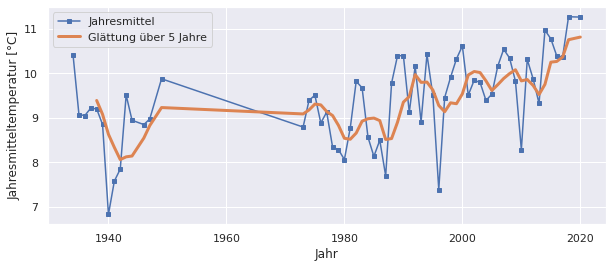

In [40]:
# import
import matplotlib.pyplot as plt

# Mittelwerte bestimmen

plt.figure(figsize=(10,4))
plt.ylabel("Jahresmitteltemperatur [°C]")
plt.xlabel("Jahr")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur [°C]"],marker="s",markersize=4, label="Jahresmittel")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur_RM5 [°C]"], lw=3, label="Glättung über 5 Jahre")
plt.legend()



# Plot 1c: Temperaturdifferenz mit rollendem Mittelwert

Um die Temperaturdifferenz zu bekommen, ziehen wir den Mittelwert über alle Jahre von den Jahreswerten ab

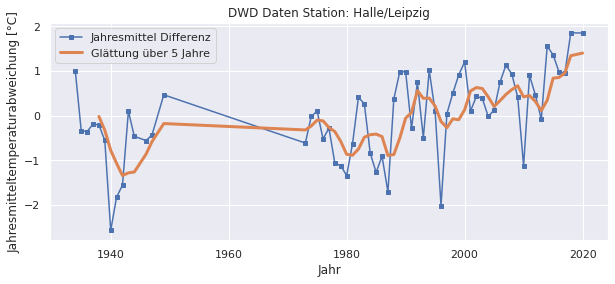

In [41]:
# Mittelwert bestimmen der abgezogen wird um Temperaturdifferenz zu bekommen
Mittelwert = Jahresmittelwerte["Jahresmitteltemperatur [°C]"].mean()

# import
import matplotlib.pyplot as plt

# Mittelwerte bestimmen

plt.figure(figsize=(10,4))
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.title("DWD Daten Station: Halle/Leipzig")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur [°C]"]-Mittelwert,marker="s",markersize=4, label="Jahresmittel Differenz")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur_RM5 [°C]"]-Mittelwert, lw=3, label="Glättung über 5 Jahre")
plt.legend()



# Plot 1d: NASA Daten plotten

Wir wollen nur die NASA Daten (nur Landflächen) dazu plotten:
https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv

## Einlesen

In [42]:
# Daten einlesen
NASA = pd.read_csv("graph.csv", header=1)
NASA

,Year,Land_Annual,Lowess(5),Ocean_Annual,Lowess(5).1
0,1880,-0.56,-0.44,-0.05,0.01
1,1881,-0.36,-0.49,0.01,-0.02
2,1882,-0.46,-0.53,0.00,-0.06
3,1883,-0.53,-0.56,-0.06,-0.09
4,1884,-0.82,-0.60,-0.15,-0.12
...,...,...,...,...,...
136,2016,1.48,1.29,0.70,0.62
137,2017,1.37,1.35,0.64,0.64
138,2018,1.23,1.41,0.60,0.65
139,2019,1.43,1.47,0.68,0.67


***Anmerkung*** : Ich habe nicht rausgekriegt wie die Glättung der NASA Daten erfolgte. Den Weg den ich oben mit dem gleitenden Mittelwert verwendet habe ist es nicht

## Plot

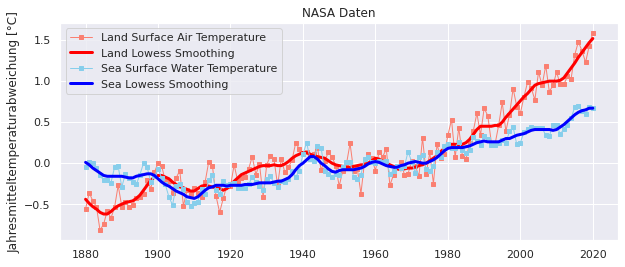

In [44]:
# import
import matplotlib.pyplot as plt

# Mittelwerte bestimmen

plt.figure(figsize=(10,4))
plt.ylabel("Temperatur [°C]")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.title("NASA Daten")
plt.plot(NASA["Year"],NASA["Land_Annual"],lw=1, marker="s",markersize=4,c="salmon", label="Land Surface Air Temperature")
plt.plot(NASA["Year"],NASA["Lowess(5)"], lw=3, c="red", label="Land Lowess Smoothing")
plt.plot(NASA["Year"],NASA["Ocean_Annual"],lw=1, marker="s",markersize=4,c="skyblue", label="Sea Surface Water Temperature")
plt.plot(NASA["Year"],NASA["Lowess(5).1"], lw=3, c="blue", label="Sea Lowess Smoothing")
plt.legend()



# Plot 1d: Temperaturdifferenz mit rollendem Mittelwert + NASA Daten

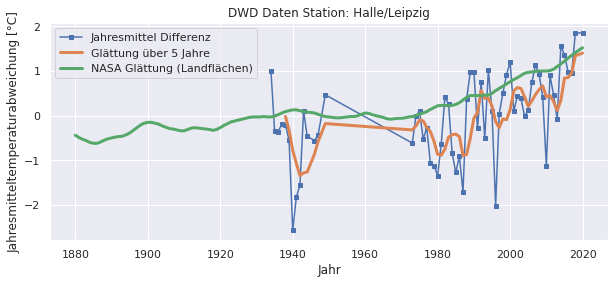

In [45]:
Mittelwert = Jahresmittelwerte["Jahresmitteltemperatur [°C]"].mean()

# import
import matplotlib.pyplot as plt

# Mittelwerte bestimmen

plt.figure(figsize=(10,4))
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.title("DWD Daten Station: Halle/Leipzig")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur [°C]"]-Mittelwert,marker="s",markersize=4, label="Jahresmittel Differenz")
plt.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur_RM5 [°C]"]-Mittelwert, lw=3, label="Glättung über 5 Jahre")
plt.plot(NASA["Year"],NASA["Lowess(5)"], lw=3, label="NASA Glättung (Landflächen)")
plt.legend()



# Plot 1e: Temperaturdifferenz mit Konfidenzintervalle (mit `Seaborn`) und rollendem Mittelwert

Bei der Darstellung mit dem Konfidenzintervall verwenden wir wieder den DataFrame mit den Tageswerten (df2)!

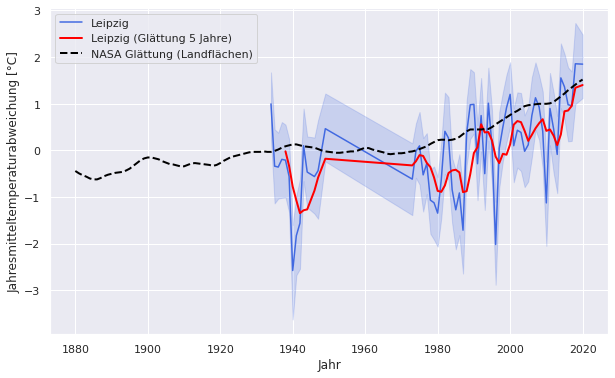

In [46]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})


fig, ax = plt.subplots()

ax = sns.lineplot(x=df_2["Jahr"],y=df_2["Tagesmitteltemperatur [°C]"]-Mittelwert, label="Leipzig", color="royalblue")
ax.plot(Jahresmittelwerte["Jahr"],Jahresmittelwerte["Jahresmitteltemperatur_RM5 [°C]"]-Mittelwert, lw=2,color="red", label="Leipzig (Glättung 5 Jahre)")
ax.plot(NASA["Year"],NASA["Lowess(5)"], lw=2,ls="--",color="black", label="NASA Glättung (Landflächen)")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend(loc="upper left")


# Plot 2: Temperaturverlauf über die Monate

## Monatsmittelwerte bestimmen

In [47]:
Monatsmittelwerte = df_2.groupby(by=["Jahr","Monat"]).mean().reset_index()
Monatsmittelwerte


,Jahr,Monat,Tagesmitteltemperatur [°C],Tag
0,1934,1,1.003226,16.0
1,1934,2,1.750000,14.5
2,1934,3,5.145161,16.0
3,1934,4,11.256667,15.5
4,1934,5,13.996774,16.0
...,...,...,...,...
727,2020,8,21.703226,16.0
728,2020,9,16.223333,15.5
729,2020,10,11.303226,16.0
730,2020,11,6.466667,15.5


#### Spalten entfernen


In [48]:
Monatsmittelwerte.drop(["Tag"],axis=1,inplace=True)
Monatsmittelwerte

,Jahr,Monat,Tagesmitteltemperatur [°C]
0,1934,1,1.003226
1,1934,2,1.750000
2,1934,3,5.145161
3,1934,4,11.256667
4,1934,5,13.996774
...,...,...,...
727,2020,8,21.703226
728,2020,9,16.223333
729,2020,10,11.303226
730,2020,11,6.466667


#### Spalte umbennen

In [49]:
Monatsmittelwerte.rename(columns={"Tagesmitteltemperatur [°C]":"Monatsmitteltemperatur [°C]"},inplace=True)
Monatsmittelwerte

,Jahr,Monat,Monatsmitteltemperatur [°C]
0,1934,1,1.003226
1,1934,2,1.750000
2,1934,3,5.145161
3,1934,4,11.256667
4,1934,5,13.996774
...,...,...,...
727,2020,8,21.703226
728,2020,9,16.223333
729,2020,10,11.303226
730,2020,11,6.466667


#### Export als CSV

In [50]:
Monatsmittelwerte.to_csv("Leipzig_Monatswerte_volle_Jahre.csv",index=False)

## Plot 2a: Monatsverlauf mit allen Jahren farblich codiert `Seaborn`

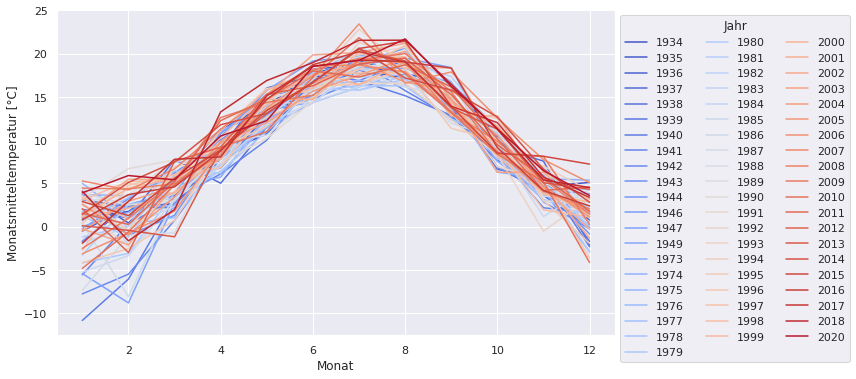

In [51]:
import seaborn as sns
Anzahl_Jahre=Monatsmittelwerte["Jahr"].nunique()
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"], hue=Monatsmittelwerte["Jahr"], palette=sns.color_palette('coolwarm', n_colors=Anzahl_Jahre))

#Extra Schritt um Titel der Legende zu entfernen und neu zu setzen (taucht sonst als Eintrag mit auf)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[1:], labels=labels[1:], ncol=3,bbox_to_anchor=(1.0, 1.0), loc='upper left', title="Jahr")



# Plot 2b: Monatsverlauf mit Standardabweichung `Seaborn`

<AxesSubplot:xlabel='Monat', ylabel='Monatsmitteltemperatur [°C]'>

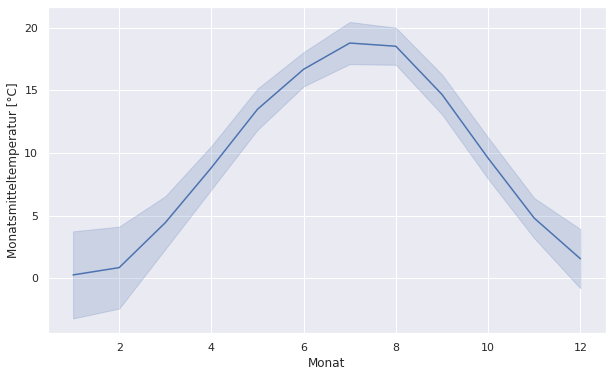

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"],ci="sd")

# Plot 2c: letzten 4 Jahre im Vergleich zum Monatsverlauf mit Standardabweichung `Seaborn` 

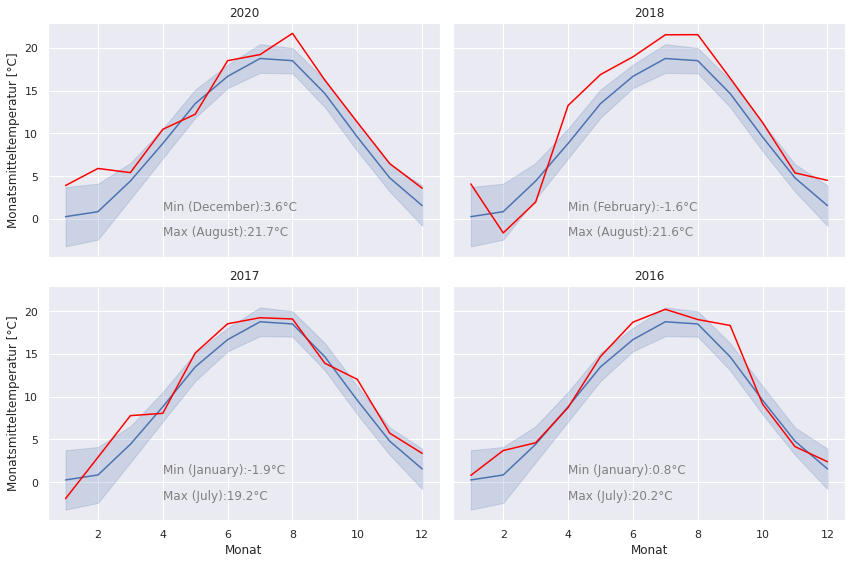

In [97]:
import seaborn as sns
import calendar
sns.set(rc={'figure.figsize':(12,8)})

# Monatswerte für jedes Jahr
Jahr2020=Monatsmittelwerte.loc[(Monatsmittelwerte["Jahr"]==2020)]
Jahr2018=Monatsmittelwerte.loc[(Monatsmittelwerte["Jahr"]==2018)]
Jahr2017=Monatsmittelwerte.loc[(Monatsmittelwerte["Jahr"]==2017)]
Jahr2016=Monatsmittelwerte.loc[(Monatsmittelwerte["Jahr"]==2016)]

# Funktion zum Darstellen der Min/Max Werte fuer ein Jahr
def print_min_max(df,ax):

    min=df["Monatsmitteltemperatur [°C]"].min().round(1)
    minMonat=df.loc[df["Monatsmitteltemperatur [°C]"].idxmin(),"Monat"]
    max=df["Monatsmitteltemperatur [°C]"].max().round(1)
    maxMonat=df.loc[df["Monatsmitteltemperatur [°C]"].idxmax(),"Monat"]
    
    Month_name_min=calendar.month_name[minMonat]
    Month_name_max=calendar.month_name[maxMonat]

    ax.text(4,1,"Min ("+Month_name_min+"):"+str(min)+"°C",color="gray", horizontalalignment='left')
    ax.text(4,-2,"Max ("+Month_name_max+"):"+str(max)+"°C",color="gray", horizontalalignment='left')
    return
    

# Figure mit 2 x 2 "subplots=ax" 
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

# Links oben : 2020
sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"],ci="sd", ax=ax[0,0])
ax[0,0].plot(Jahr2020["Monat"],Jahr2020["Monatsmitteltemperatur [°C]"], color="red")
ax[0,0].set_title("2020")
print_min_max(Jahr2020,ax[0,0])

# Rechts oben : 2018
sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"],ci="sd", ax=ax[0,1])
ax[0,1].plot(Jahr2018["Monat"],Jahr2018["Monatsmitteltemperatur [°C]"], color="red")
ax[0,1].set_title("2018")
print_min_max(Jahr2018,ax[0,1])

# Links unten : 2017
sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"],ci="sd", ax=ax[1,0])
ax[1,0].plot(Jahr2017["Monat"],Jahr2017["Monatsmitteltemperatur [°C]"], color="red")
ax[1,0].set_title("2017")
print_min_max(Jahr2017,ax[1,0])

# Rechts unten : 2016
sns.lineplot(x=Monatsmittelwerte["Monat"],y=Monatsmittelwerte["Monatsmitteltemperatur [°C]"],ci="sd", ax=ax[1,1])
ax[1,1].plot(Jahr2016["Monat"],Jahr2016["Monatsmitteltemperatur [°C]"], color="red")
ax[1,1].set_title("2016")
print_min_max(Jahr2016,ax[1,1])


fig.tight_layout()

# Plot 3: Mittlere Jahrestemperatur im Vergleich zur minimalen Jahrestemperatur (Scatter mit `Seaborn`)

Wir wollen nun die Frage klären ob Jahre mit einer hohen Jahresdurchschnittstemperatur auch im Winter zu hohen Temperaturen führen

**Hintergrund**: Auslegung von Heizungssystemen in Zeiten des Klimawandels

## Werte erzeugen
Statt wie vorher mit `.groupby()`und `.mean()`zu arbeiten verwenden wir nun `.NamedAgg` (Sonderformat von `.agg()`)

**Vorteil**: Wir erzeugen nur Werte von Spalten die wir brauchen und können dafür auch jeweils verschiedene Funktionen (also min/mean/max usw.) verwenden

In [53]:
Min_Max_Mean_Jahreswerte = df_2.groupby("Jahr").agg(
    max=pd.NamedAgg(column='Tagesmitteltemperatur [°C]', aggfunc='max'), 
    min=pd.NamedAgg(column='Tagesmitteltemperatur [°C]', aggfunc='min'), 
    mean=pd.NamedAgg(column='Tagesmitteltemperatur [°C]', aggfunc='mean')
).reset_index()
Min_Max_Mean_Jahreswerte.columns=["Jahr","maximale Jahresmitteltemperatur [°C]","minimale Jahresmitteltemperatur [°C]","mittlere Jahresmitteltemperatur [°C]"]
Min_Max_Mean_Jahreswerte

,Jahr,maximale Jahresmitteltemperatur [°C],minimale Jahresmitteltemperatur [°C],mittlere Jahresmitteltemperatur [°C]
0,1934,23.8,-8.8,10.405205
1,1935,27.3,-10.1,9.070959
2,1936,24.1,-10.8,9.051913
3,1937,26.8,-10.6,9.216712
4,1938,25.3,-13.9,9.200548
...,...,...,...,...
56,2015,30.2,-2.9,10.771233
57,2016,26.2,-6.7,10.388251
58,2017,24.5,-7.9,10.365753
59,2018,29.5,-9.5,11.265205


## csv speichern

In [54]:
Min_Max_Mean_Jahreswerte.to_csv("Leipzig_Min_Max_Mean_Jahreswerte_volle_Jahre.csv",index=False)

colormap: https://stackoverflow.com/questions/49761221/make-seaborn-show-a-colorbar-instead-of-a-legend-when-using-hue-in-a-bar-plot

## Plot

Diesmal haben wir eine Colorbar statt der Legende mit den vielen Jahren. Da zwischendurch jedoch Jahre fehlen ist die Colorbar nicht ganz korrekt

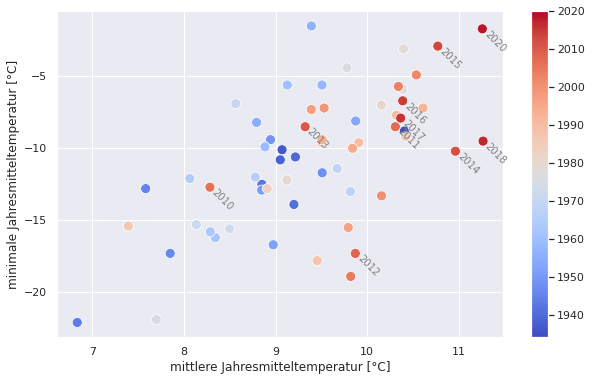

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Funktion um Jahr als Text darzustellen
def label_year(year):

    xpos=Min_Max_Mean_Jahreswerte.loc[Min_Max_Mean_Jahreswerte["Jahr"]==year,"mittlere Jahresmitteltemperatur [°C]"].values[0]
    ypos=Min_Max_Mean_Jahreswerte.loc[Min_Max_Mean_Jahreswerte["Jahr"]==year,"minimale Jahresmitteltemperatur [°C]"].values[0]
    xoff=1
    yoff=0
    ax.text(xpos,ypos,str(year),horizontalalignment='center',ha='left', va='top', color="gray",rotation=-45,fontsize=10)

    return

# Anzahl der Jahre für palette Parameter im scatterplot
Anzahl_Jahre=Min_Max_Mean_Jahreswerte["Jahr"].nunique()

# color palette
cpalette = "coolwarm"

# colormap erstellen
norm = plt.Normalize(Min_Max_Mean_Jahreswerte["Jahr"].min(), Min_Max_Mean_Jahreswerte["Jahr"].max())
sm = plt.cm.ScalarMappable(cmap=cpalette, norm=norm)
sm.set_array([])

# plot
ax = sns.scatterplot(data=Min_Max_Mean_Jahreswerte, x="mittlere Jahresmitteltemperatur [°C]",y="minimale Jahresmitteltemperatur [°C]", s=100, hue="Jahr", palette=sns.color_palette(cpalette, n_colors=Anzahl_Jahre))

# jahre "labeln"
label_year(2020)
label_year(2018)
label_year(2017)
label_year(2016)
label_year(2015)
label_year(2014)
label_year(2013)
label_year(2012)
label_year(2011)
label_year(2010)

# legende entfernen
ax.get_legend().remove()

# color bar hinzufuegen
ax.figure.colorbar(sm)

plt.show()


# Plot 3b: Mittlere Jahrestemperatur im Vergleich zur minimalen Jahresmindesttemperatur (Scatter mit `Seaborn`)

Bisher haben wir die gegenüber der minimalen Jahrestemperatur dargestellt. Diese wird aus dem den `Tagesmittelwerte` bestimmt. Für die Heizung ist aber nicht der `Tagesmittelwert`, sondern die `Tagesminimaltemperatur` interessant. Dafür müssen wir noch mal die Rohdaten vom DWD anschauen und uns dafür die richtige Spalte raussuchen.

- **TGK**;Minimum der Lufttemperatur am Erdboden in 5cm Hoehe;°C

Wir wiederholen also alle unsere Schritte davor und nutzen jetzt die Spalte **TGK** statt **TMK**


## Daten einlesen und verarbeiten

Diesmal ist die Reihenfolge etwas vertauscht, das Ergebnis ist das gleiche

In [56]:
# historische Daten einlesen
data_hist = pd.read_csv("produkt_klima_tag_19340101_20181231_02932.txt", sep=";")
data_hist = data_hist.loc[:,("MESS_DATUM"," TGK")]

# aktuelle Daten einlesen
data_aktuell = pd.read_csv("produkt_klima_tag_20190719_20210118_02932.txt", sep=";")
data_aktuell = data_aktuell.loc[:,("MESS_DATUM"," TGK")]

# Daten zusammenfuehren
df = pd.concat([data_hist, data_aktuell]).reset_index()

# Spalte umbennnen
df.rename(columns={" TGK":"Tagesminimumstemperatur [°C]"}, inplace=True)

# Datumsformat einführen
df['Datum'] = pd.to_datetime(df['MESS_DATUM'],format='%Y%m%d')

# Tag/Monat/Jahr Spalte hinzufuegen
df["Jahr"] = pd.DatetimeIndex(df['Datum']).year
df["Monat"] = pd.DatetimeIndex(df['Datum']).month
df["Tag"] = pd.DatetimeIndex(df['Datum']).day

# Spalte MESS_DATUM entfernen
df = df.drop(["MESS_DATUM"],axis=1)

# Werte "-999" rausfiltern 
df = df.loc[df["Tagesminimumstemperatur [°C]"] > -999]

# Jahre entfernen die weniger als 360 Tage enthalten
df = df.groupby(by=["Jahr"]).filter(lambda x: len(x) > 360)

# Mininmale und mittlere Jahresmitteltemperatur
TempMin_Min_Mean_Jahreswerte = df.groupby("Jahr").agg(
    min=pd.NamedAgg(column='Tagesminimumstemperatur [°C]', aggfunc='min'), 
    mean=pd.NamedAgg(column='Tagesminimumstemperatur [°C]', aggfunc='mean')
).reset_index()
TempMin_Min_Mean_Jahreswerte.columns=["Jahr","minimale Jahresmindesttemperatur [°C]","mittlere Jahresmindesttemperatur [°C]"]
TempMin_Min_Mean_Jahreswerte.head()

,Jahr,minimale Jahresmindesttemperatur [°C],mittlere Jahresmindesttemperatur [°C]
0,1935,-16.8,3.251233
1,1936,-17.9,3.958743
2,1937,-11.5,4.293973
3,1938,-23.5,3.842740
4,1939,-17.7,3.879452


Bei der `mittleren Jahresmindesttemperatur` wäre vor allem interessant nur die `Hauptheizmonate` **Dezember+Januar+Februar** auszuwerten. Dafür müssen wir erneut filtern

In [58]:
df_Heizmonate = df.loc[(df["Monat"]==1) | (df["Monat"]==2) | (df["Monat"]==12)  ]
df_Heizmonate["Monat"].unique()


array([ 1,  2, 12])

In [59]:
TempMinJanFebDez_Mean_Jahreswerte = df_Heizmonate.groupby("Jahr").agg(
    mean=pd.NamedAgg(column='Tagesminimumstemperatur [°C]', aggfunc='mean')
).reset_index()
TempMinJanFebDez_Mean_Jahreswerte.columns=["Jahr","mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]"]
TempMinJanFebDez_Mean_Jahreswerte.head()

,Jahr,mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]
0,1935,-3.472222
1,1936,-1.647253
2,1937,-3.448889
3,1938,-3.411111
4,1939,-2.420000


### Plotten

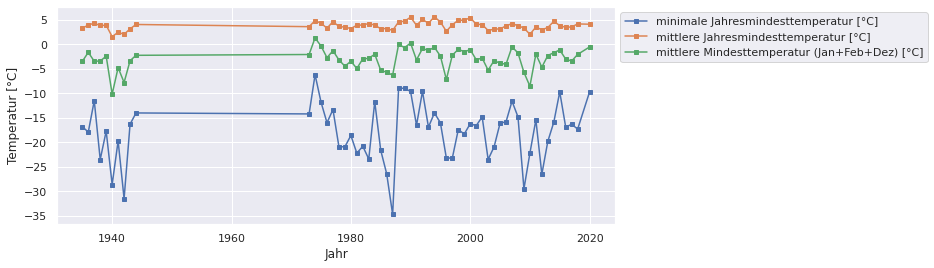

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.xlabel("Jahr")
plt.ylabel("Temperatur [°C]")
plt.plot(TempMin_Min_Mean_Jahreswerte["Jahr"],TempMin_Min_Mean_Jahreswerte["minimale Jahresmindesttemperatur [°C]"],marker="s", ms=4, label="minimale Jahresmindesttemperatur [°C]")
plt.plot(TempMin_Min_Mean_Jahreswerte["Jahr"],TempMin_Min_Mean_Jahreswerte["mittlere Jahresmindesttemperatur [°C]"],marker="s", ms=4, label="mittlere Jahresmindesttemperatur [°C]")
plt.plot(TempMinJanFebDez_Mean_Jahreswerte["Jahr"],TempMinJanFebDez_Mean_Jahreswerte["mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]"],marker="s", ms=4, label="mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)

## DataFrame zusammenführen

Wir haben jetzt drei DataFrames

1. `Min_Max_Mean_Jahreswerte` mit den **minimalen** und **mittleren Jahrestemperaturen**
2. `TempMin_Min_Mean_Jahreswerte` mit den **minimalen** und **mittleren Jahresmindesttemperaturen**
3. `TempMinJanFebDez_Mean_Jahreswerte` mit den **mittleren Mindesttemperatur (Jan+Feb+Dez)**

Diese drei wollen wir jetzt zu einem zusammenführen

### ersten beiden DataFrames anzeigen

In [61]:
Min_Max_Mean_Jahreswerte.head(3)

,Jahr,maximale Jahresmitteltemperatur [°C],minimale Jahresmitteltemperatur [°C],mittlere Jahresmitteltemperatur [°C]
0,1934,23.8,-8.8,10.405205
1,1935,27.3,-10.1,9.070959
2,1936,24.1,-10.8,9.051913


In [62]:
TempMin_Min_Mean_Jahreswerte.head(3)

,Jahr,minimale Jahresmindesttemperatur [°C],mittlere Jahresmindesttemperatur [°C]
0,1935,-16.8,3.251233
1,1936,-17.9,3.958743
2,1937,-11.5,4.293973


### Ersten beiden DataFrames zusammenführen

In [63]:
MinMean_total = Min_Max_Mean_Jahreswerte.join(TempMin_Min_Mean_Jahreswerte.set_index("Jahr"), on="Jahr")
MinMean_total.head(3)

,Jahr,maximale Jahresmitteltemperatur [°C],minimale Jahresmitteltemperatur [°C],mittlere Jahresmitteltemperatur [°C],minimale Jahresmindesttemperatur [°C],mittlere Jahresmindesttemperatur [°C]
0,1934,23.8,-8.8,10.405205,NaN,NaN
1,1935,27.3,-10.1,9.070959,-16.8,3.251233
2,1936,24.1,-10.8,9.051913,-17.9,3.958743


Für **1934** gab es keinen Eintrag in `Min_Max_Mean_Jahreswerte`. In unserem zusammengeführten neuen DataFrame steht dort deshalb **NaN**

### dritten DataFrame hinzufuegen

In [64]:
MinMean_total = MinMean_total.join(TempMinJanFebDez_Mean_Jahreswerte.set_index("Jahr"), on="Jahr")
MinMean_total.head(3)

,Jahr,maximale Jahresmitteltemperatur [°C],minimale Jahresmitteltemperatur [°C],mittlere Jahresmitteltemperatur [°C],minimale Jahresmindesttemperatur [°C],mittlere Jahresmindesttemperatur [°C],mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]
0,1934,23.8,-8.8,10.405205,NaN,NaN,NaN
1,1935,27.3,-10.1,9.070959,-16.8,3.251233,-3.472222
2,1936,24.1,-10.8,9.051913,-17.9,3.958743,-1.647253


### als csv exportieren

In [65]:
MinMean_total.to_csv("Leipzig_Min_Max_Mean_Gesamt_Jahreswerte_volle_Jahre.csv", index=False)

## Plot 


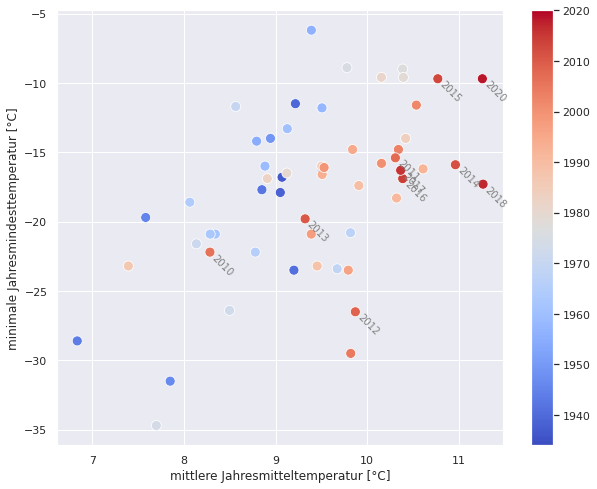

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bildgröße

plt.figure(figsize=(10,8))


# Funktion um Jahr als Text darzustellen
def label_year(year):

    xpos=MinMean_total.loc[MinMean_total["Jahr"]==year,"mittlere Jahresmitteltemperatur [°C]"].values[0]
    ypos=MinMean_total.loc[MinMean_total["Jahr"]==year,"minimale Jahresmindesttemperatur [°C]"].values[0]
    xoff=1
    yoff=0
    ax.text(xpos,ypos,str(year),horizontalalignment='center',ha='left', va='top', color="gray",rotation=-45,fontsize=10)

    return

# Anzahl der Jahre für palette Parameter im scatterplot
Anzahl_Jahre=Min_Max_Mean_Jahreswerte["Jahr"].nunique()

# color palette
cpalette = "coolwarm"

# colormap erstellen
norm = plt.Normalize(Min_Max_Mean_Jahreswerte["Jahr"].min(), Min_Max_Mean_Jahreswerte["Jahr"].max())
sm = plt.cm.ScalarMappable(cmap=cpalette, norm=norm)
sm.set_array([])

# plot
ax = sns.scatterplot(data=MinMean_total, x="mittlere Jahresmitteltemperatur [°C]",y="minimale Jahresmindesttemperatur [°C]", s=100, hue="Jahr", palette=sns.color_palette(cpalette, n_colors=Anzahl_Jahre))

# jahre "labeln"
label_year(2020)
label_year(2018)
label_year(2017)
label_year(2016)
label_year(2015)
label_year(2014)
label_year(2013)
label_year(2012)
label_year(2011)
label_year(2010)

# legende entfernen
ax.get_legend().remove()

# color bar hinzufuegen
ax.figure.colorbar(sm)

plt.show()


# Plot 3c: Mittlere Jahrestemperatur im Vergleich zur mittleren Mindesttemperatur (Jan+Feb+Dez) (Scatter mit `Seaborn`)


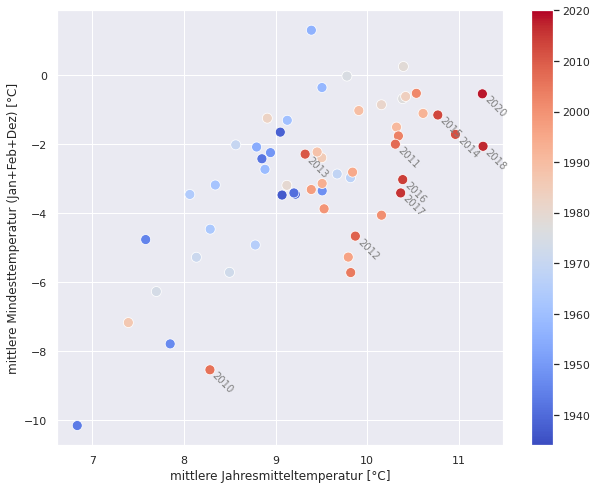

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bildgröße

plt.figure(figsize=(10,8))


# Funktion um Jahr als Text darzustellen
def label_year(year):

    xpos=MinMean_total.loc[MinMean_total["Jahr"]==year,"mittlere Jahresmitteltemperatur [°C]"].values[0]
    ypos=MinMean_total.loc[MinMean_total["Jahr"]==year,"mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]"].values[0]
    xoff=1
    yoff=0
    ax.text(xpos,ypos,str(year),horizontalalignment='center',ha='left', va='top', color="gray",rotation=-45,fontsize=10)

    return

# Anzahl der Jahre für palette Parameter im scatterplot
Anzahl_Jahre=Min_Max_Mean_Jahreswerte["Jahr"].nunique()

# color palette
cpalette = "coolwarm"

# colormap erstellen
norm = plt.Normalize(Min_Max_Mean_Jahreswerte["Jahr"].min(), Min_Max_Mean_Jahreswerte["Jahr"].max())
sm = plt.cm.ScalarMappable(cmap=cpalette, norm=norm)
sm.set_array([])

# plot
ax = sns.scatterplot(data=MinMean_total, x="mittlere Jahresmitteltemperatur [°C]",y="mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]", s=100, hue="Jahr", palette=sns.color_palette(cpalette, n_colors=Anzahl_Jahre))

# jahre "labeln"
label_year(2020)
label_year(2018)
label_year(2017)
label_year(2016)
label_year(2015)
label_year(2014)
label_year(2013)
label_year(2012)
label_year(2011)
label_year(2010)

# legende entfernen
ax.get_legend().remove()

# color bar hinzufuegen
ax.figure.colorbar(sm)

plt.show()


# Plot 4: Regression für Jahre seit 2010

## Daten Filtern

In [68]:
MinMean_total_since2010=MinMean_total.loc[MinMean_total["Jahr"]>=2010]
MinMean_total_since2010

,Jahr,maximale Jahresmitteltemperatur [°C],minimale Jahresmitteltemperatur [°C],mittlere Jahresmitteltemperatur [°C],minimale Jahresmindesttemperatur [°C],mittlere Jahresmindesttemperatur [°C],mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]
51,2010,28.4,-12.7,8.283836,-22.2,2.044658,-8.541111
52,2011,25.2,-8.5,10.307945,-15.4,3.521370,-1.996667
53,2012,28.4,-17.3,9.871038,-26.5,2.976230,-4.663736
54,2013,27.2,-8.5,9.323014,-19.8,3.423014,-2.285556
55,2014,27.2,-10.2,10.963288,-15.9,4.682192,-1.712222
56,2015,30.2,-2.9,10.771233,-9.7,3.824932,-1.150000
57,2016,26.2,-6.7,10.388251,-16.9,3.455191,-3.024176
58,2017,24.5,-7.9,10.365753,-16.3,3.553973,-3.411111
59,2018,29.5,-9.5,11.265205,-17.3,4.157808,-2.057778
60,2020,28.3,-1.7,11.257650,-9.7,4.101093,-0.536264


## Plot 4a: Regression (`mittlere Jahrestemp` vs. `mittlere Mindesttemperatur (Jan+Feb+Dez)`) 

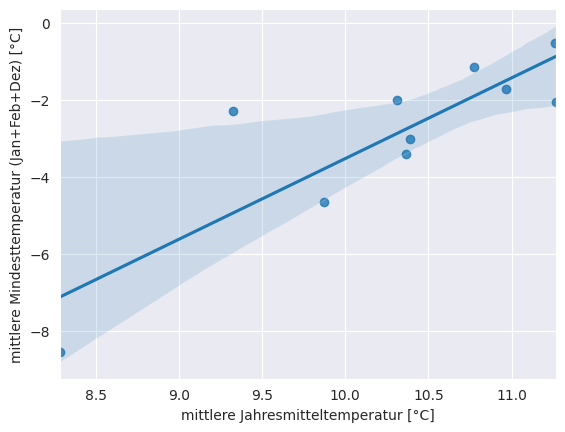

In [69]:
import seaborn as sns

sns.reset_defaults()
sns.set_style("darkgrid")

sns.regplot(data=MinMean_total_since2010, x="mittlere Jahresmitteltemperatur [°C]",y="mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]")
plt.show()

## Plot 4b: Multiplot Regression  (`mittlere Jahrestemp` vs. `minimale Jahrestemperatur [°C]`) + (`mittlere Jahrestemp` vs. `minimale Jahresmindesttemperatur [°C]`) + (`mittlere Jahrestemp` vs. `mittlere Mindesttemperatur (Jan+Feb+Dez)`) 

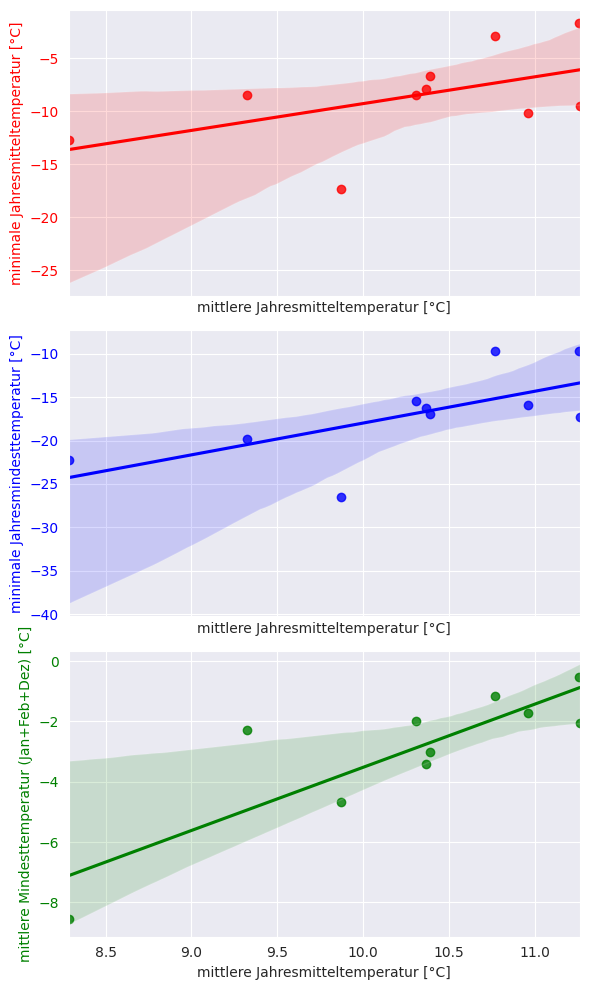

In [70]:
import seaborn as sns

sns.reset_defaults()
sns.set_style("darkgrid")


fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, figsize=(6,10))

# plot 1
sns.regplot(ax=ax1, data=MinMean_total_since2010, x="mittlere Jahresmitteltemperatur [°C]",y="minimale Jahresmitteltemperatur [°C]", color="red")
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

# plot 2
sns.regplot(ax=ax2, data=MinMean_total_since2010, x="mittlere Jahresmitteltemperatur [°C]",y="minimale Jahresmindesttemperatur [°C]", color="blue")
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

# plot 3
sns.regplot(ax=ax3, data=MinMean_total_since2010, x="mittlere Jahresmitteltemperatur [°C]",y="mittlere Mindesttemperatur (Jan+Feb+Dez) [°C]", color="green")
ax3.yaxis.label.set_color('green')
ax3.tick_params(axis='y', colors='green')

fig.tight_layout()
plt.show()